In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
nt = 1001
nx = 101

#nu = 0.1
nu = (0.01/math.pi)

dt = 0.001
#dx = 2 / (nx-1)
x = np.linspace(-1,1, nx)
dx = abs(x[1]-x[0])

In [3]:
x[0]

np.float64(-1.0)

In [4]:
x[1]

np.float64(-0.98)

In [5]:
x[0]-x[1]

np.float64(-0.020000000000000018)

In [6]:
u = np.zeros(nx)
un = np.zeros(nx)
uf = np.zeros((nt, nx))

In [8]:
u = -np.sin(math.pi * x)

In [9]:
u

array([ 1.22464680e-16,  6.27905195e-02,  1.25333234e-01,  1.87381315e-01,
        2.48689887e-01,  3.09016994e-01,  3.68124553e-01,  4.25779292e-01,
        4.81753674e-01,  5.35826795e-01,  5.87785252e-01,  6.37423990e-01,
        6.84547106e-01,  7.28968627e-01,  7.70513243e-01,  8.09016994e-01,
        8.44327926e-01,  8.76306680e-01,  9.04827052e-01,  9.29776486e-01,
        9.51056516e-01,  9.68583161e-01,  9.82287251e-01,  9.92114701e-01,
        9.98026728e-01,  1.00000000e+00,  9.98026728e-01,  9.92114701e-01,
        9.82287251e-01,  9.68583161e-01,  9.51056516e-01,  9.29776486e-01,
        9.04827052e-01,  8.76306680e-01,  8.44327926e-01,  8.09016994e-01,
        7.70513243e-01,  7.28968627e-01,  6.84547106e-01,  6.37423990e-01,
        5.87785252e-01,  5.35826795e-01,  4.81753674e-01,  4.25779292e-01,
        3.68124553e-01,  3.09016994e-01,  2.48689887e-01,  1.87381315e-01,
        1.25333234e-01,  6.27905195e-02, -0.00000000e+00, -6.27905195e-02,
       -1.25333234e-01, -

In [10]:
len(u)

101

In [11]:
uf[0,:] = u

In [12]:
u

array([ 1.22464680e-16,  6.27905195e-02,  1.25333234e-01,  1.87381315e-01,
        2.48689887e-01,  3.09016994e-01,  3.68124553e-01,  4.25779292e-01,
        4.81753674e-01,  5.35826795e-01,  5.87785252e-01,  6.37423990e-01,
        6.84547106e-01,  7.28968627e-01,  7.70513243e-01,  8.09016994e-01,
        8.44327926e-01,  8.76306680e-01,  9.04827052e-01,  9.29776486e-01,
        9.51056516e-01,  9.68583161e-01,  9.82287251e-01,  9.92114701e-01,
        9.98026728e-01,  1.00000000e+00,  9.98026728e-01,  9.92114701e-01,
        9.82287251e-01,  9.68583161e-01,  9.51056516e-01,  9.29776486e-01,
        9.04827052e-01,  8.76306680e-01,  8.44327926e-01,  8.09016994e-01,
        7.70513243e-01,  7.28968627e-01,  6.84547106e-01,  6.37423990e-01,
        5.87785252e-01,  5.35826795e-01,  4.81753674e-01,  4.25779292e-01,
        3.68124553e-01,  3.09016994e-01,  2.48689887e-01,  1.87381315e-01,
        1.25333234e-01,  6.27905195e-02, -0.00000000e+00, -6.27905195e-02,
       -1.25333234e-01, -

In [13]:
for n in range (1,nt):
  un = u.copy()
  for i in range(1, nx-1):
    u[i] = un[i] -  un[i] * (dt/dx)  *(un[i] - un[i-1]) + (nu * dt/(dx**2)) * (un[i+1]-2*un[i]+un[i-1])
    uf[n, i] = u[i]

<ipython-input-13-2988616870>:4: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] -  un[i] * (dt/dx)  *(un[i] - un[i-1]) + (nu * dt/(dx**2)) * (un[i+1]-2*un[i]+un[i-1])
<ipython-input-13-2988616870>:4: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] -  un[i] * (dt/dx)  *(un[i] - un[i-1]) + (nu * dt/(dx**2)) * (un[i+1]-2*un[i]+un[i-1])
<ipython-input-13-2988616870>:4: RuntimeWarning: invalid value encountered in scalar add
  u[i] = un[i] -  un[i] * (dt/dx)  *(un[i] - un[i-1]) + (nu * dt/(dx**2)) * (un[i+1]-2*un[i]+un[i-1])


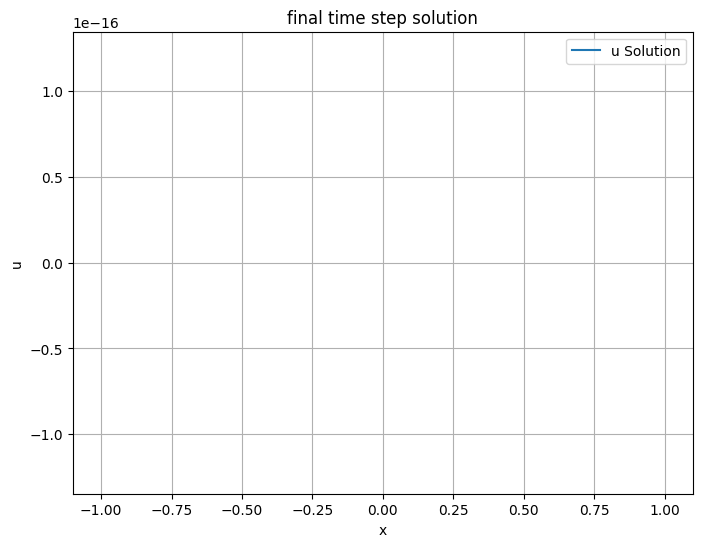

In [14]:
plt.figure(figsize=(8,6))
plt.plot(x,u, label="u Solution")
plt.title("final time step solution")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.legend()
plt.show()

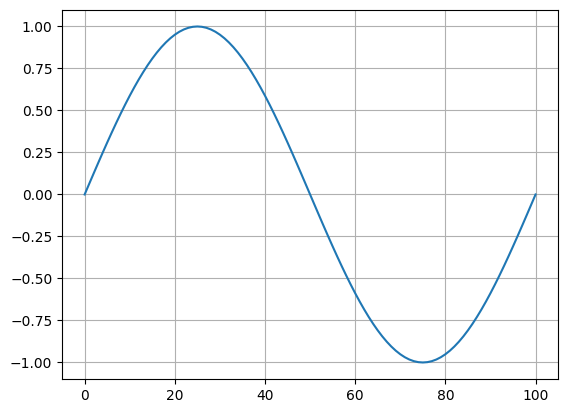

In [15]:
plt.plot(uf[0,:])
plt.plot(uf[-1,:])

plt.grid(True)
plt.show()

In [16]:
sns.set_style("white")
plt.figure(figsize=(5,3), dpi = 3000)
sns.heatmap(uf.T, cmap="jet")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## コードの説明

このノートブックは、一次元Burgers方程式を数値的に解くための初期設定と初期条件の設定を行っています。

### ライブラリのインポート

以下のセルでは、必要なライブラリをインポートしています。

- `numpy`: 数値計算（配列操作など）に使用します。
- `matplotlib.pyplot`: グラフ描画に使用します。
- `math`: 数学的な関数（sinなど）に使用します。
- `seaborn`: 統計データの可視化ライブラリですが、ここでは直接使用されていません。

### パラメータの設定

以下のセルでは、数値計算に必要なパラメータを設定しています。

- `nt`: 時間ステップの数（1001）
- `nx`: 空間グリッド点の数（101）
- `nu`: 動粘性係数（0.1）。コメントアウトされている行は別の値を設定しようとしていたものです。
- `dt`: 時間ステップのサイズ（0.001）
- `x`: 空間グリッド点を生成します。-1から1までの範囲を`nx`個の等間隔な点で区切ります。
- `dx`: 空間ステップのサイズを計算します。

### グリッド点の確認

以下の3つのセルは、生成された空間グリッド`x`の最初の2点とその差を確認しています。

- 最初の点 `x[0]`
- 2番目の点 `x[1]`
- その差 `x[0] - x[1]`

### 配列の初期化

以下のセルでは、計算に使用する配列を初期化しています。

- `u`: 現在の時間の速度場を格納する配列です。`nx`個のゼロで初期化されます。
- `un`: 以前の時間の速度場を格納する配列です。`nx`個のゼロで初期化されます。
- `uf`: 各時間ステップでの速度場を格納する配列です。`nt`行`nx`列のゼロ行列で初期化されます。

### 初期条件の設定

以下のセルでは、速度場`u`に初期条件を設定しています。

- `u = -np.sin(math.pi * x)`: 速度場`u`を`-sin(πx)`という初期条件で設定しています。これはBurgers方程式の一般的な初期条件の一つです。

### 初期条件の確認 (u)

以下のセルでは、設定された初期条件`u`の内容を表示して確認しています。

### 配列長の確認

以下のセルでは、速度場`u`の配列長が`nx`と等しいか確認しています。

### 初期条件を記録

以下のセルでは、設定された初期条件である現在の速度場`u`を、全時間ステップの結果を格納する配列`uf`の最初の行（時間ステップ0）にコピーしています。

### 初期条件の再確認 (u)

以下のセルでは、`uf`にコピーされた後の現在の速度場`u`の内容を再度表示して確認しています。この内容は「初期条件の確認 (u)」と同じであるはずです。

### 時間発展の計算

以下のセルでは、時間発展の計算を行っています。

- `for n in range (1,nt)`: 時間ステップを1から`nt-1`までループします。
- `un = u.copy()`: 現在の速度場`u`を`un`にコピーします。これは次の時間ステップの計算に使用されます。
- `for i in range(1, nx-1)`: 空間グリッド点を1から`nx-2`までループします。境界条件は考慮されていません。
- `u[i] = ...`: Burgers方程式の数値解法（中心差分と風上差分の組み合わせと思われます）を用いて、次の時間ステップの速度場を計算します。
- `uf[n, i] = u[i]`: 計算された速度場を`uf`配列に記録します。

### 最終時間ステップの解のプロット

以下のセルでは、最後の時間ステップにおける速度場`u`をプロットしています。

- `plt.figure(figsize=(8,6))`: グラフのサイズを設定します。
- `plt.plot(x,u, label="u Solution")`: `x`を横軸、最終時間ステップの`u`を縦軸としてプロットします。
- `plt.title("final time step solution")`: グラフのタイトルを設定します。
- `plt.xlabel("x")`: x軸のラベルを設定します。
- `plt.ylabel("u")`: u軸のラベルを設定します。
- `plt.grid(True)`: グリッドを表示します。
- `plt.legend()`: 凡例を表示します。
- `plt.show()`: グラフを表示します。

### 初期条件と最終時間ステップの解の比較プロット

以下のセルでは、初期条件と最終時間ステップの解を同じグラフにプロットして比較しています。

- `plt.plot(uf[0,:])`: `uf`配列の最初の行（初期条件）をプロットします。
- `plt.plot(uf[-1,:])`: `uf`配列の最後の行（最終時間ステップの解）をプロットします。
- `plt.grid(True)`: グリッドを表示します。
- `plt.show()`: グラフを表示します。

### 時間発展のヒートマップ表示

以下のセルでは、全時間ステップにおける速度場`uf`のヒートマップを表示しています。

- `sns.set_style("white")`: seabornのスタイルを"white"に設定します。
- `plt.figure(figsize=(5,3), dpi = 3000)`: グラフのサイズと解像度を設定します。
- `sns.heatmap(uf.T, cmap="jet")`: `uf`配列を転置（行と列を入れ替え）してヒートマップとして表示します。`cmap="jet"`でカラーマップを設定しています。
- `plt.show()`: ヒートマップを表示します。

### `nu`を小さくした際の計算失敗について

`nu`は動粘性係数を表しており、数値スキームにおいて拡散項（安定化に寄与する項）の大きさを制御します。`nu`の値を小さくすると、この拡散項の効果が弱まります。

今回使用されている数値スキームは、特定の条件下（特に拡散項が小さい場合）で不安定になる可能性があります。`nu`を小さくしたことで、スキームの安定性の条件を満たさなくなり、計算中に数値的な振動が増幅され、「overflow」や「invalid value」といったエラーが発生したと考えられます。

これは、数値解法において、物理的なパラメータ（この場合は`nu`）と離散化パラメータ（`dt`や`dx`）のバランスが重要であることを示しています。特に移流項が支配的になる（`nu`が小さい）場合、より安定なスキームを選択するか、時間ステップ`dt`や空間ステップ`dx`を調整する必要があります。